<a href="https://colab.research.google.com/github/beatriceadel/ppsdcw3/blob/main/codingws3_ml_ans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning w/ Python**

## **Apa itu Machine Learning?**


>The use and development of computer systems that are able to **learn and adapt without following explicit instructions**, by using **algorithms and statistical models** to analyse and draw inferences from **patterns in data**. 

-*Oxford Dictionaries*

<img src="https://volcanohong.github.io/content/images/2016/ml_process.png" width=600 height=300/>

## **Libraries & Tools Python untuk Machine Learning**


*   **NumPy & SciPy**: General-purpose numerical computation
*   **Pandas**: Data analysis & manipulation
*   **Matplotlib & Seaborn**: Data visualization
*   **Scikit-Learn**: Machine learning functions and algorithms
*   **Tensorflow**: Machine learning models
*   **PyTorch**: Machine learning, computer vision, & natural language processing
*   **Keras**: Machine learning, deep learning, neural networks



# **Studi Kasus**

Untuk workshop ini, kita akan mengaplikasikan beberapa macam algoritma pada dataset **'Breast Cancer Wisconsin'** yang diambil dari [*UCI Machine Learning Repository*](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))

Dataset dapat di download melalui link [ini](https://raw.githubusercontent.com/beatriceadel/ppsdcw3/main/breast-cancer-wisconsin.csv)

Setelah data sudah didownload, kita bisa memulai dengan mengimport libraries yang akan kita gunakan: NumPy, Pandas, Matplotlib, dan Seaborn.

In [1]:
# Import library - library yang akan digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mengidentifikasi Masalah

Pertama - tama, dalam membangun sebuah machine learning model, kita perlu mengidentifikasi terlebih dahulu masalah apa yang ingin kita selesaikan dengan model yang kita buat.

**Masalah - masalah paling umum dalam Machine Learning:**

*   *Classification*
*   Regression
*   Clustering

<img src="https://www.researchgate.net/profile/Frank-Nielsen-3/publication/314626729/figure/fig1/AS:810830673244160@1570328505835/The-three-pillars-of-learning-in-data-science-clustering-flat-or-hierarchical.ppm" width=600 height=400/>

In [2]:
# Membaca data
url = "https://raw.githubusercontent.com/beatriceadel/ppsdcw3/main/breast-cancer-wisconsin.csv"
data = pd.read_csv(url)
data

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## Memproses Data
Dalam machine learning, sebelum kita membangun model, kita juga perlu melakukan **data pre-processing.**


### Memeriksa Missing Values

Missing values atau data yang kosong dapat mengganggu proses komputer dalam mempelajari data. Maka dari itu, ada beberapa cara yang dapat kita lakukan untuk mengatasi missing values:


*   Menghapus instansi data (row) yang mengandung missing value
*   Mengganti missing value dengan rata - rata dari data atribut tersebut
*   Mengganti missing value dengan sebuah konstanta (constant)

Kita dapat memfilter missing values dengan menggunakan cara yang sama seperti ketika kita membuat kondisi saat menulis `if` statement.

In [3]:
# Menyeleksi missing values
missing_values = data["bare_nucleoli"] == "?"
data[missing_values]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


#### **Latihan**

Coba periksa apakah kolom ```size_uniformity``` dan ```shape_uniformity```mengandung missing values atau tidak. 


In [4]:
# Jawaban
missing_values = (data["size_uniformity"] == "?") | (data["shape_uniformity"] == "?") 
data[missing_values]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class


In [5]:
# Menghapus data dengan missing values
cleaned_data = data[data.bare_nucleoli!= "?"]
cleaned_data

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


### Melihat korelasi antar fitur/kolom (bar chart)

Terkadang ada fitur / kolom di dataset yang kita miliki yang sebenarnya tidak relevan untuk proses training. 

Kita dapat melihat fitur mana saja yang relevan dan tidak melalui visualisasi data dengan menggunakan [Matplotlib](https://matplotlib.org/) dan [Seaborn](http://seaborn.pydata.org/). 

Kita dapat melihat korelasi antara satu fitur dengan target fitur kita (class) dengan menggunakan **bar chart**.

Text(0.5, 0.98, 'Clump Thickness w.r.t. Class')

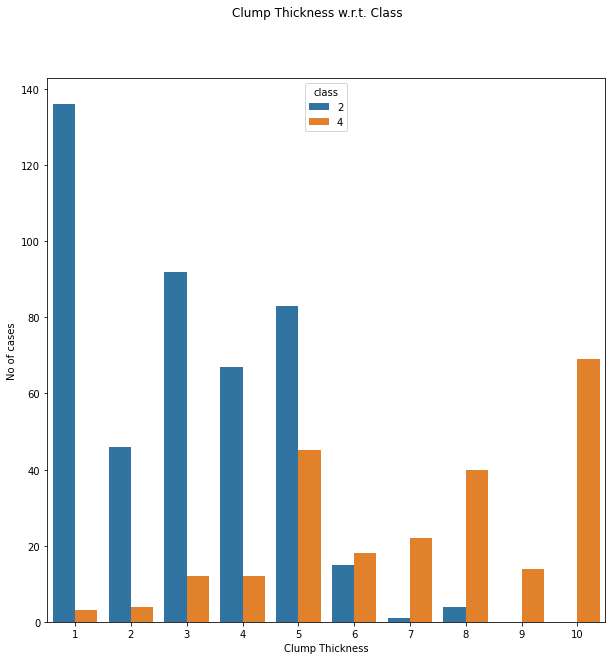

In [6]:
# Menampilkan bar chart untuk melihat korelasi clump_thickness dengan class

fig = plt.figure(figsize=(10,10))
ax = sns.countplot(x='clump_thickness', hue='class', data=cleaned_data)
ax.set(xlabel='Clump Thickness', ylabel='No of cases')
fig.suptitle("Clump Thickness w.r.t. Class")

#### **Latihan**

Tampilkan bar chart yang menunjukkan korelasi antara fitur `size_uniformity` dengan target fitur kita (`class`)


Text(0.5, 0.98, 'Size Uniformity w.r.t. Class')

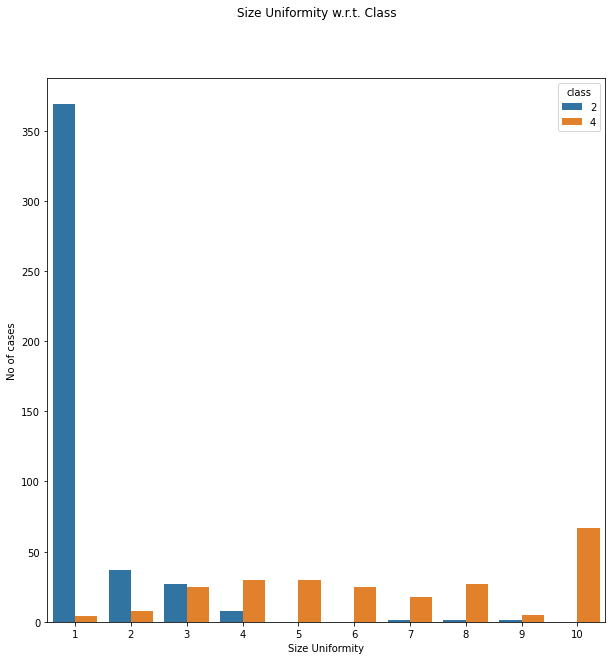

In [7]:
# Jawaban 
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(x='size_uniformity', hue='class', data=cleaned_data)
ax.set(xlabel='Size Uniformity', ylabel='No of cases')
fig.suptitle("Size Uniformity w.r.t. Class")

### Melihat korelasi antar fitur/kolom (heatmap)

Untuk melihat korelasi antara semua fitur, bentuk visualisasi yang paling mudah adalah dengan menggunakan **heatmap.** Dalam sebuah heatmap, angka *+1* menunjukkan tingkat korelasi positif yang paling kuat, angka *-1* mennjukkan tingkat korelasi negatif yang paling kuat, dan angka *0* mengindikasikan bahwa tidak ada korelasi antara kedua fitur tersebut. 

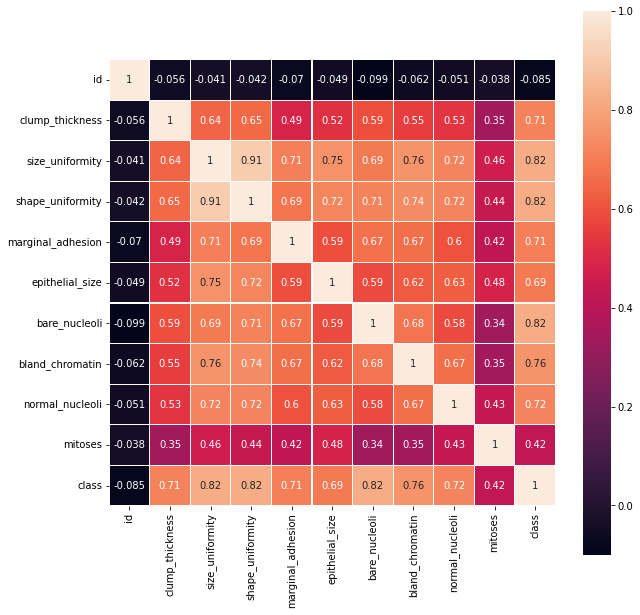

In [8]:
# Menampilkan heatmap

plt.figure(figsize=(10, 10))
sns.heatmap(cleaned_data.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True)
plt.show()

Dari heatmap di atas, kita dapat melihat bahwa fitur "id" dan "mitoses" tidak memiliki korelasi yang kuat dengan "class". Jadi, kita dapat menyeleksi fitur/kolom yang akan kita gunakan dalam proses training sebagai berikut:

In [9]:
#Seleksi fitur
features_selection = ['clump_thickness', 'size_uniformity', 'shape_uniformity', 'marginal_adhesion', 'epithelial_size', 'bare_nucleoli', 'bland_chromatin', 'normal_nucleoli']

## Membangun Machine Learning Model

Untuk membangun machine learning model kali ini, kita akan mencoba menggunakan beberapa algoritma yang tersedia di [scikit-learn](https://scikit-learn.org/stable/index.html). Pertama, kita import terlebih dahulu tools yang akan kita gunakan.

*   `train_test_split`, `cross_val_score` dari `sklearn.model_selection`
*   `accuracy_score` dari `sklearn.metrics` 
*   `time` 



In [10]:
# Import dari scikit-learn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

Kita ingin membuat model berdasarkan fungsi **y = f(x)** dimana ketika input x (data baru) diterima, machine learning model kita dapat menentukan y (class) berdasarkan data yang sudah dipelajari di proses training. 

Untuk itu, kita juga perlu membagi dataset kita menjadi "train set" dan "test set". Train set akan digunakan untuk melatih machine learning model kita, sedangkan test set akan digunakan untuk mengevaluasi model kita. 

Dalam percobaan kita, kita akan menggunakan fungsi `train_test_split` untuk membagi secara random (`random_state = 42`), dan kita akan tentukan jumlah test set sebanyak 20% dari total data (`test_size = 0.2`)

In [16]:
# Menentukan pembagian data

x = cleaned_data.loc[:,features_selection]
y = cleaned_data.loc[:, 'class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

accuracy = []
cvs = []

Setelah itu, kita perlu:

1.   Menentukan algoritma klasifikasi / classifier (`clf`) yang akan digunakan. 
2.   Melatih classifier `clf` dengan train dataset `x_train` dan `y_train`.
3.   Menggunakan data `x_test` untuk melihat hasil prediksi model.
4.   Mengestimasi akurasi model dengan test dataset dan **cross-validation**.



Apa itu cross-validation? 

Cross-validation adalah salah satu cara untuk mengevaluasi machine learning model. Dalam cross-validation, dataset dibagi menjadi beberapa subset (misal *n*), *1* subset akan disimpan untuk validasi atau test, dan *n-1* subset lainnya akan digunakan untuk proses training. Proses ini diulang hingga semua subset sempat digunakan untuk validasi, dan rata - rata akurasi dari tiap repetisinya adalah hasil akurasi akhir.

###Nearest Neighbor

Nearest Neighbor adalah alogritma yang cara kerjanya adalah mencari "tetangga" terdekat untuk menentukan data yang baru diterima akan diklasifikasikan ke kelompok yang mana. 

<img src="http://3.bp.blogspot.com/-ZslDMqm5M9o/T8ja_f_fALI/AAAAAAAAAt4/z7w55YAZXpw/s1600/p1.png" width=400 height=300/>

Kita dapat menggunakan algoritma ini dengan mengimport `KNeighborsClassifier` dari  `sklearn.neighbors`

In [17]:
# Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=10)

end = time.time()

accuracy.append(accuracy_score(prediction, y_test))
cvs.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 95.62%
Cross validation score: 97.22% (+/- 4.01%)
Execution time: 0.078441 seconds 



###Decision Tree

Decision Tree adalah algoritma yang cara kerjanya adalah menyusun suatu struktur hierarki untuk menentukan data yang baru diterima akan diklasifikasikan ke kelompok yang mana. 

<img src="https://miro.medium.com/max/6810/1*1tGLoeGg4cDwQXSLSgD5Zg.png" width=300 height=150/>

Kita dapat menggunakan algoritma ini dengan mengimport `DecisionTreeClassifier` dari `sklearn.tree`

In [18]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=10)

end = time.time()

accuracy.append(accuracy_score(prediction, y_test))
cvs.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 94.16%
Cross validation score: 94.74% (+/- 4.91%)
Execution time: 0.052164 seconds 



###Random Forest

Random Forest adalah algoritma yang dibangun dengan beberapa decision tree, dimana output dari seluruh decision tree digabung menjadi 1 output. 

<img src="https://miro.medium.com/max/2612/0*f_qQPFpdofWGLQqc.png" width=300 height=200/>

Kita dapat menggunakan algoritma ini dengan mengimport `RandomForestClassifier` dari `sklearn.ensemble`

In [19]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=10)

end = time.time()

accuracy.append(accuracy_score(prediction, y_test))
cvs.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 96.35%
Cross validation score: 96.94% (+/- 4.76%)
Execution time: 1.5953 seconds 



###Naive Bayes (Latihan)

Naive Bayes adalah algoritma yang mengaplikasikan **Bayes' Theorem**, dimana cara kerjanya adalah menghitung probabilitas sesuatu berdasarkan data yang sudah diketahui. Probabilitas inilah yang menentukan data yang baru akan diklasifikasikan ke kelompok yang mana. Kita dapat menggunakan algoritma ini dengan mengimport `GaussianNB` dari `sklearn.naive_bayes`

In [20]:
# Naive Bayes (Latihan)

from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=10)

end = time.time()

accuracy.append(accuracy_score(prediction, y_test))
cvs.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 97.08%
Cross validation score: 96.49% (+/- 3.49%)
Execution time: 0.056579 seconds 



In [21]:
# Perbandingan hasil akurasi

col = {'accuracy': accuracy, 'cvs': cvs}
index = ['KNeighbors', 'GaussianNB', 'DecisionTree', 'RandomForest']

df = pd.DataFrame(col, index=index)
df

,accuracy,cvs
KNeighbors,0.956204,0.972229
GaussianNB,0.941606,0.947357
DecisionTree,0.963504,0.969352
RandomForest,0.970803,0.964919
